<a href="https://colab.research.google.com/github/Chubbyman2/MIT_Labs/blob/master/Intro_to_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

!pip install mitdeeplearning
import mitdeeplearning as mdl

import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 2.1MB 25kB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.1.2-cp36-none-any.whl size=2114586 sha256=c5c0073168ca4fdc539e86fe952e9d7d29c70f8afc5a747f1627bd47aeb55259
  Stored in directory: /root/.cache/pip/wheels/27/e1/73/5f01c787621d8a3c857f59876c79e304b9b64db9ff5bd61b74
Successfully built mitdeeplearning


In [ ]:
# 0-d Tensors
sport = tf.constant("Tennis", tf.string)
number = tf.constant(1.41421356237, tf.float64)

print("'sport' is a {}-d Tensor".format(tf.rank(sport.numpy())))
print("'number' is a {}-d Tensor".format(tf.rank(sport.numpy())))

'sport' is a 0-d Tensor
'number' is a 0-d Tensor


In [ ]:
# Use vectors/lists to create 1-d Tensors
sports = tf.constant(["Tennis", "Basketball"], tf.string)
numbers = tf.constant([3.141592, 1.414213, 2.71821], tf.float64)
print("'sports' is a {}-d Tensor with shape: {}".format(tf.rank(sports).numpy(), tf.shape(sports)))
print("'numbers' is a {}-d Tensor with shape: {}".format(tf.rank(numbers).numpy(), tf.shape(numbers)))

'sports' is a 1-d Tensor with shape: [2]
'numbers' is a 1-d Tensor with shape: [3]


In [ ]:
# 2-d Tensor
matrix = tf.constant([[2, 3, 4], [5, 6, 7]])

assert isinstance(matrix, tf.Tensor) # matrix must be a tf.Tensor object
assert tf.rank(matrix).numpy() == 2 # matrix must be a 2-d Tensor

In [ ]:
# 4-d Tensor with all 0's
images = tf.zeros(shape=(10, 256, 256, 3))

assert isinstance(images, tf.Tensor)
assert tf.rank(images).numpy() == 4
assert tf.shape(images).numpy().tolist() == [10, 256, 256, 3] # Is it this shape = True

In [ ]:
# Accessing subtensors (list elements) within a higher-rank Tensor
row_vector = matrix[1]
column_vector = matrix[:, 2]
scalar = matrix[1, 2]

print("'row_vector': {}".format(row_vector.numpy()))
print("'column_vector': {}".format(column_vector.numpy()))
print("'scalar': {}".format(scalar.numpy()))

tf.Tensor(7, shape=(), dtype=int32)
'row_vector': [5 6 7]
'column_vector': [4 7]
'scalar': 7


**Computations on Tensors**

![alt text](https://camo.githubusercontent.com/38d69872497861176d1231c3e1c6c3ef61270e44/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f61616d696e692f696e74726f746f646565706c6561726e696e672f6d61737465722f6c6162312f696d672f6164642d67726170682e706e67)

In [ ]:
a = tf.constant(15)
b = tf.constant(61)

c1 = tf.add(a, b)
c2 = a + b
print(c1.numpy())
print(c2.numpy())

76
76


![alt text](https://camo.githubusercontent.com/51a0292c93d9f6c25ad9a834c92e06e850e38e04/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f61616d696e692f696e74726f746f646565706c6561726e696e672f6d61737465722f6c6162312f696d672f636f6d7075746174696f6e2d67726170682e706e67)

In [ ]:
def func(a, b):
  c = tf.add(a, b)
  d = tf.subtract(b, 1)
  e = tf.multiply(c, d)
  return e 

In [ ]:
a, b = 1.5, 2.5

e_out = func(a, b)

# Scalar values have no shape
print(e_out)

tf.Tensor(6.0, shape=(), dtype=float32)


**Neural Networks**

![alt text](https://camo.githubusercontent.com/e31abc1367dbb092c50c3759e202d15b30afb95e/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f61616d696e692f696e74726f746f646565706c6561726e696e672f6d61737465722f6c6162312f696d672f636f6d7075746174696f6e2d67726170682d322e706e67)

In [ ]:
class OurDenseLayer(tf.keras.layers.Layer):
  def __init__(self, n_output_nodes):
    super(OurDenseLayer, self).__init__()
    self.n_output_nodes = n_output_nodes

  def build(self, input_shape):
    d = int(input_shape[-1])

    # Define and initialize weight matrix W and bias b
    # Initialization is random
    self.W = self.add_weight("weight", shape=[d, self.n_output_nodes])
    self.b = self.add_weight("bias", shape=[1, self.n_output_nodes])

  def call(self, x):
    # Matrix multiplication - matmul
    z = tf.matmul(x, self.W) + self.b

    y = tf.sigmoid(z)
    return y

tf.random.set_seed(1)
layer = OurDenseLayer(3) # n_output_nodes
layer.build((1, 2)) # input_shape
x_input = tf.constant([[1.0, 2.0]], shape=(1, 2)) # input
y = layer.call(x_input)

print(y.numpy())
mdl.lab1.test_custom_dense_layer_output(y)

[[0.26978594 0.45750412 0.66536945]]
[PASS] test_custom_dense_layer_output


True

**Using Sequential()**

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

n_output_nodes = 3

model = Sequential()

dense_layer = Dense(n_output_nodes, activation="sigmoid")
model.add(dense_layer)

In [ ]:
x_input = tf.constant([[1.0, 2.0]], shape=(1, 2))

model_output = model(x_input).numpy()
print(model_output)

[[0.5607363 0.6566898 0.1249697]]


**Using Subclassing**

Define layers in __init__() function.

Define forward pass using the call() function.

Helps define custom layers, custom training loops, custom activation functions, custom models.

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class SubclassModel(tf.keras.Model):

  def __init__(self, n_output_nodes): # define model layers inside
    super(SubclassModel, self).__init__()
    self.dense_layer = Dense(n_output_nodes, activation="sigmoid")

  def call(self, inputs):
    return self.dense_layer(inputs)

In [ ]:
n_output_nodes = 3
model = SubclassModel(n_output_nodes)

x_input = tf.constant([[1.0, 2.0]], shape=(1, 2))

print(model.call(x_input))

tf.Tensor([[0.6504887  0.47828162 0.8373661 ]], shape=(1, 3), dtype=float32)


In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class IdentityModel(tf.keras.Model):

  def __init__(self, n_output_nodes): # define model layers inside
    super(IdentityModel, self).__init__()
    self.dense_layer = Dense(n_output_nodes, activation="sigmoid")

  # Allows model to return just the input, if the condition is met
  def call(self, inputs, isidentity=False):
    x = self.dense_layer(inputs)
    if isidentity:
      return inputs
    return x

In [ ]:
n_output_nodes = 3
model = IdentityModel(n_output_nodes)

x_input = tf.constant([[1.0, 2.0]], shape=(1, 2))

out_activate = model.call(x_input)
out_identity = model.call(x_input, isidentity = True)

print("Network output with activation: {}; network identity output: {}".format(out_activate.numpy(), out_identity.numpy()))

Network output with activation: [[0.29996255 0.62776643 0.48460066]]; network identity output: [[1. 2.]]


**Automatic Differentiation and GradientTape**

Automatic differentiation is vital for backpropagation.

When a forward pass is made through th network, all operations are recorded to a "tape".

To compute gradient, tape is played backwards, then discarded.

So tf.GradientTape can only compute a gradient **one time**. 

We can create a **persistent gradient tape** to compute multiple gradients over the same computation.

In [ ]:
# Compute gradient of y = x^2 at x = 3

x = tf.Variable(3.0) 

with tf.GradientTape() as tape:
  y = x * x

dy_dx = tape.gradient(y, x)
print(dy_dx.numpy())

6.0


Initializing x = [[-0.35975078]]


Text(0, 0.5, 'x value')

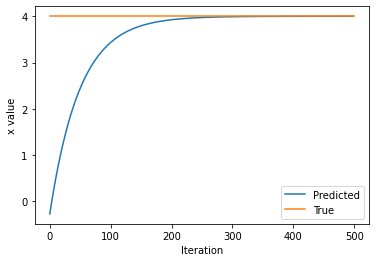

In [ ]:
# Remember, SGD and differentiation are used to optimize a loss function
x = tf.Variable([tf.random.normal([1])]) # Make variable because the value changes via x.assign()
print("Initializing x = {}".format(x.numpy()))

learning_rate = 1e-2 # Learning rate for stochastic gradient descent
history = []
x_f = 4 # Target value

# Run SGD for a number of iterations, compute loss for each iteration
# Compute derivative of the loss with respect to x, perform SGD update
for i in range(500):
  with tf.GradientTape() as tape:
    loss = (x - x_f)**2 # Squared error

  grad = tape.gradient(loss, x) # Computes derivative w/ respect to x
  new_x = x - learning_rate*grad # SGD update
  x.assign(new_x) # Updates value of x
  history.append(x.numpy()[0])

# Plot evolution of x as we optimize towards x_f
plt.plot(history)
plt.plot([0, 500], [x_f, x_f])
plt.legend(("Predicted", "True"))
plt.xlabel("Iteration")
plt.ylabel("x value")
